<a href="https://colab.research.google.com/github/lauraemmanuella/AprendizadoMaquina/blob/main/1_Preparacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Notebook referente à aula 2 - Preparação dos dados na disciplina Aprendizado de Máquina

## 1 - Montagem do Drive

In [1]:
#monte o drive caso precise usar/salvar arquivos do seu drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#mude o ponto de execução para outro diretório, caso deseje
%cd /content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina

/content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina


## 2- Preparação dos dados para tarefas de AM


[Dataset retirado daqui](https://github.com/CaiqueCoelho/Preprocessing-Dataset-Template)



### 2.1) Visão geral do dataset

In [3]:
import pandas as pd

In [ ]:
#leitura do dataset no meu drive
df = pd.read_csv('./bases/fake_data_2.csv')

In [4]:
#OU coloca direto o endereço do csv (nesse caso, nem precisaria montar o drive)
df = pd.read_csv('https://raw.githubusercontent.com/CaiqueCoelho/Preprocessing-Dataset-Template/master/fake_data_2.csv')

In [5]:
#visão do dataset
df


,cargo,idade,salario,bonus,sócio
0,Diretor,45,24000.0,10000.0,sim
1,Analista,22,8000.0,2000.0,não
2,Programador,30,NaN,1000.0,não
3,Gerente,24,15100.0,NaN,não
4,Gerente,30,35000.0,6000.0,sim
5,Programador,22,5300.0,2000.0,não
6,Analista,20,NaN,1200.0,não
7,Diretor,50,18000.0,8000.0,sim
8,Fundador,65,38000.0,28000.0,sim
9,Analista,32,7300.0,4000.0,não


# **3 -Pré-Processamento dos Dados**

## **3.1) Dados Faltantes**

**Estratégias:**

1.   **Remoção das colunas**: Solução menos recomendada. Somente deverá ser utilizada quando a variável não exercer influência no resultado procurado.
2.   **Remoção das linhas**: Solução melhor, porém ainda não é a ideal para um dataset com poucos exemplos.
3.   **Preenchimento com um valor definido**: Pode-se preencher os dados faltantes com o valor que melhor convier para o problema. Para ser usado adequadamente, precisa-se saber que valor é esse.
4.   **Preenchimento com a média ou moda**: Solução mais adequada na maioria dos casos. 

In [6]:
#Verifica se tem NaN
print(df.isnull())


    cargo  idade  salario  bonus  sócio
0   False  False    False  False  False
1   False  False    False  False  False
2   False  False     True  False  False
3   False  False    False   True  False
4   False  False    False  False  False
5   False  False    False  False  False
6   False  False     True  False  False
7   False  False    False  False  False
8   False  False    False  False  False
9   False  False    False  False  False
10  False  False    False   True  False
11  False  False    False  False  False
12  False  False    False  False  False
13  False  False    False  False  False


In [ ]:
hasNan = df.isnull().sum()
print(hasNan)

cargo      0
idade      0
salario    2
bonus      2
sócio      0
dtype: int64


[Documentação dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

In [7]:
#1. Remoção das colunas

dfTeste = df.copy() #fazendo uma cópia apenas para testar o comando (não será aplicado ao df)

dfTeste.dropna(axis=1, inplace=True) #axis = 1 indica coluna; inplace True executa a operação de fato, não apenas no retorno dessa linha

print(dfTeste)
#Observe que nesse exemplo ficamos sem as colunas salário e bônus

          cargo  idade sócio
0       Diretor     45   sim
1      Analista     22   não
2   Programador     30   não
3       Gerente     24   não
4       Gerente     30   sim
5   Programador     22   não
6      Analista     20   não
7       Diretor     50   sim
8      Fundador     65   sim
9      Analista     32   não
10  Programador     35   não
11  Programador     28   não
12     Fundador     28   sim
13  Programador     30   sim


In [8]:
#2. Remoção das linhas

dfTeste = df.copy() #fazendo uma cópia apenas para testar o comando (não será aplicado ao df)

dfTeste.dropna(inplace=True) #o default do dropna é axis = 0 (linhas)

print(dfTeste)
#Observe que nesse exemplo, ficamos com menos exemplos

          cargo  idade  salario    bonus sócio
0       Diretor     45  24000.0  10000.0   sim
1      Analista     22   8000.0   2000.0   não
4       Gerente     30  35000.0   6000.0   sim
5   Programador     22   5300.0   2000.0   não
7       Diretor     50  18000.0   8000.0   sim
8      Fundador     65  38000.0  28000.0   sim
9      Analista     32   7300.0   4000.0   não
11  Programador     28   4500.0   2200.0   não
12     Fundador     28  30000.0  12000.0   sim
13  Programador     30  14000.0  10000.0   sim


In [10]:
#3. Preenchimento com um valor definido

dfTeste = df.copy() #fazendo uma cópia apenas para testar o comando (não será aplicado ao df)

dfTeste.fillna(0,inplace=True) #Preencher todos os valores faltantes por zero (não é uma boa estratégia)

print(dfTeste)

          cargo  idade  salario    bonus sócio
0       Diretor     45  24000.0  10000.0   sim
1      Analista     22   8000.0   2000.0   não
2   Programador     30      0.0   1000.0   não
3       Gerente     24  15100.0      0.0   não
4       Gerente     30  35000.0   6000.0   sim
5   Programador     22   5300.0   2000.0   não
6      Analista     20      0.0   1200.0   não
7       Diretor     50  18000.0   8000.0   sim
8      Fundador     65  38000.0  28000.0   sim
9      Analista     32   7300.0   4000.0   não
10  Programador     35   2344.0      0.0   não
11  Programador     28   4500.0   2200.0   não
12     Fundador     28  30000.0  12000.0   sim
13  Programador     30  14000.0  10000.0   sim


In [ ]:
df

Documentação dos imputadores Sklearn

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute

In [ ]:
#4. Preencher com a média 

from sklearn.impute import SimpleImputer
import numpy as np

impute_mean = SimpleImputer(missing_values = np.nan, strategy='mean')



In [ ]:
#realizar transformação apenas nas colunas com dados faltantes
df[['salario', 'bonus']] = impute_mean.fit_transform(df[['salario', 'bonus']]) 

print(df)

          cargo  idade       salario    bonus sócio
0       Diretor     45  24000.000000  10000.0   sim
1      Analista     22   8000.000000   2000.0   não
2   Programador     30  16795.333333   1000.0   não
3       Gerente     24  15100.000000   7200.0   não
4       Gerente     30  35000.000000   6000.0   sim
5   Programador     22   5300.000000   2000.0   não
6      Analista     20  16795.333333   1200.0   não
7       Diretor     50  18000.000000   8000.0   sim
8      Fundador     65  38000.000000  28000.0   sim
9      Analista     32   7300.000000   4000.0   não
10  Programador     35   2344.000000   7200.0   não
11  Programador     28   4500.000000   2200.0   não
12     Fundador     28  30000.000000  12000.0   sim
13  Programador     30  14000.000000  10000.0   sim


**Observação**

SimpleImputer é uma classe scikit -learn que é útil para lidar com os dados ausentes no conjunto de dados 

A classe [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) possui as estratégias: Média, Mediana, Mais frequente ou Valor constante

A estratégia de imputação.

* Se for “média”, substitua os valores ausentes usando a média ao longo de cada coluna. Só pode ser usado com dados numéricos.

* Se for “mediano”, substitua os valores ausentes usando a mediana ao longo de cada coluna. Só pode ser usado com dados numéricos.

* Se “most_frequent”, substitua missing usando o valor mais frequente ao longo de cada coluna. Pode ser usado com strings ou dados numéricos. Se houver mais de um valor, apenas o menor será retornado.

* Se “constante”, substitua os valores ausentes por fill_value. Pode ser usado com strings ou dados numéricos.

No caso dos pré-processadores:

* fit_transform() é usado nos dados de treinamento para que possamos dimensionar os dados de treinamento e também aprender os parâmetros de dimensionamento desses dados. 

* O método fit() apenas obtem os dados necessários para aplicar a transformação. 

* O método transform() aplica a normalização para os dados.

#### **Pergunta:**

**Qual(is) desse métodos devemos usar na normalização do conjunto de treino ? e no de teste?**

## **3.2) Outliers**

https://lucasmbribeiro.medium.com/boxplot-1c8d2e0cb158


https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097


https://pt.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule


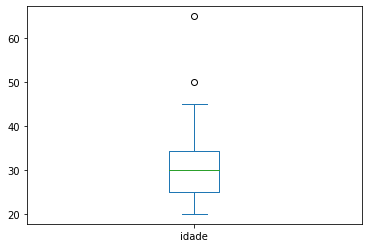

In [ ]:
df['idade'].plot(kind = 'box')


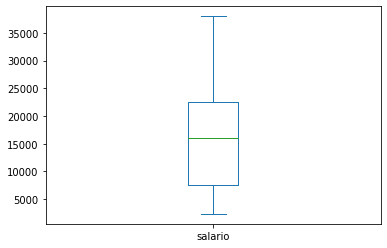

In [ ]:
df['salario'].plot(kind = 'box')

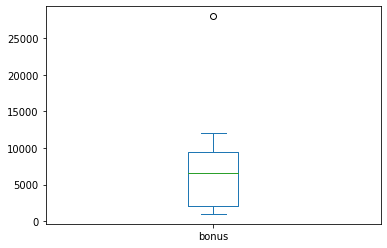

In [ ]:
df['bonus'].plot(kind = 'box')

**Como são divididos os quartis?**

Q1 = 25% da nossa amostra. 

Q2 = 50% da nossa amostra. 

Q3 = 75% da nossa amostra. 

IQR (variação interquartil) = Q3 — Q1. É a diferença entre o quartil superior e inferior.


**Um dos métodos para eliminação de outliers é a regra do 1.5*IQR**

Para isso, precisamos achar:
* o limite inferior (o menor valor que aceitamos antes que vire outlier)
> LI = Q1 — (1,5 * IQR)

* e o limite superior (o maior valor que aceitamos antes que vire outlier).

 > LS = Q3 + (1,5 * IQR)

In [ ]:

#trata outlier pela regra do 1.5*IQR (variação interquartil)

dfTeste = df.copy() #fazendo uma cópia apenas para testar o comando (não será aplicado ao df)

q1 = dfTeste['idade'].quantile(0.25) #primeiro quartil
q3 = dfTeste['idade'].quantile(0.75)  #terceiro quartil
iqr = q3 - q1
lLim = q1 - 1.5 * iqr 
hLim = q3 + 1.5 * iqr
print(lLim)
print(hLim)


11.125
48.125


In [ ]:
dfTeste['idade'] < lLim

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
Name: idade, dtype: bool

In [ ]:
dfTeste['idade'] > hLim


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8      True
9     False
10    False
11    False
12    False
13    False
Name: idade, dtype: bool

In [ ]:
dfTeste.loc[dfTeste['idade'] < lLim, 'idade'] = lLim #substitui os valores abaixo do limite inferior pelo limite inferior

In [ ]:
#dfTeste.loc[dfTeste['idade'] > hLim,'idade']
dfTeste.loc[dfTeste['idade'] > hLim, 'idade'] = hLim #substitui os valores acima do limite superior pelo limite superior
print(dfTeste)   

          cargo   idade       salario    bonus sócio
0       Diretor  45.000  24000.000000  10000.0   sim
1      Analista  22.000   8000.000000   2000.0   não
2   Programador  30.000  16795.333333   1000.0   não
3       Gerente  24.000  15100.000000   7200.0   não
4       Gerente  30.000  35000.000000   6000.0   sim
5   Programador  22.000   5300.000000   2000.0   não
6      Analista  20.000  16795.333333   1200.0   não
7       Diretor  48.125  18000.000000   8000.0   sim
8      Fundador  48.125  38000.000000  28000.0   sim
9      Analista  32.000   7300.000000   4000.0   não
10  Programador  35.000   2344.000000   7200.0   não
11  Programador  28.000   4500.000000   2200.0   não
12     Fundador  28.000  30000.000000  12000.0   sim
13  Programador  30.000  14000.000000  10000.0   sim


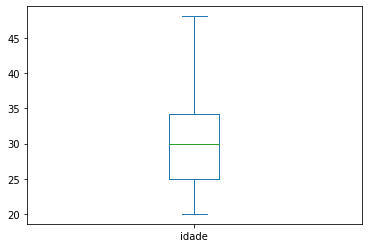

In [ ]:

dfTeste['idade'].plot(kind = 'box')


**Atividade: Retirar outliers da coluna bonus**

## **3.3) Mudança de escala**

As duas técnicas mais populares para reescalar dados numéricos são **normalização por reescala** e **normalização por padronização**. 

* A **normalização por reescala** dimensiona as variáveis de entrada para o intervalo 0:1 (ou -1:1 quando tem valores negativos). 

* A **normalização por padronização** dimensiona cada variável de entrada separadamente para ter uma média 0 e um desvio padrão 1 (*distribuição normal padrão*).

**Dica**: Use normalização por reescala quando seus dados não tiverem distribuição normal e você desejar *manter a distribuição original*. A normalização por padronização trará seus dados para uma distribuição normal.

Outros escaladores: 
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html


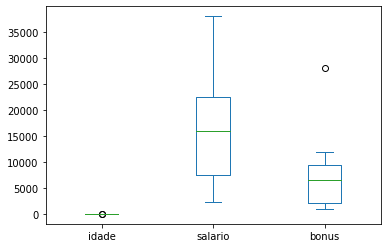

In [ ]:
#Observe por esse gráfico, a diferença de escala entre as variáveis numéricas
#Para alguns algoritmos, isso faz com que ele praticamente desconsidere aqueles com escala menor
df.plot(kind = 'box') 

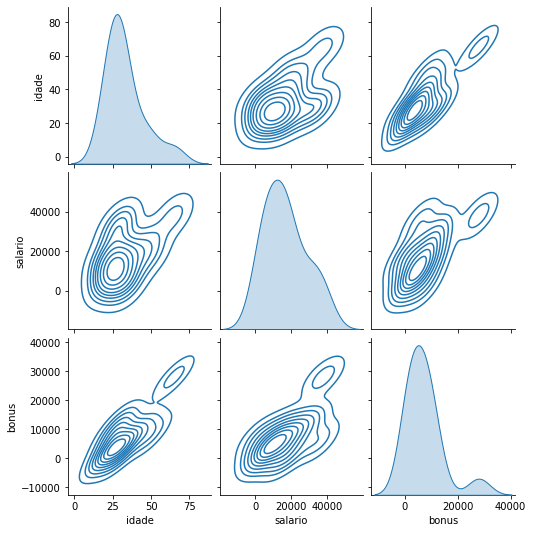

In [ ]:
import seaborn as sb

sb.pairplot(df, kind='kde')

**StandardScaler**

Normalização por padronização

Assim como o MinMaxScaler o StandardScaler age sobre as colunas, porém seu método é diferente uma vez que este subtrai do valor em questão a média da coluna e divide o resultado pelo desvio padrão. No final temos uma distribuição de dados com desvio padrão igual a 1 e variância de 1 também. 

Esse método trabalha melhor em dados com distribuição normal porém vale a tentativa para outros tipos de distribuições.
 > valor = (valor — média) / desvioPadrão

In [ ]:
from sklearn.preprocessing import StandardScaler

dfTeste = df.copy() #fazendo uma cópia apenas para testar o comando (não será aplicado ao df)

dfTeste[['idade', 'salario', 'bonus']] = StandardScaler().fit_transform(dfTeste[['idade', 'salario', 'bonus']])

print(dfTeste)

          cargo     idade   salario     bonus sócio
0       Diretor  1.002248  0.657862  0.415034   sim
1      Analista -0.907361 -0.803107 -0.770778   não
2   Programador -0.243149  0.000000 -0.919005   não
3       Gerente -0.741308 -0.154802  0.000000   não
4       Gerente -0.243149  1.662279 -0.177872   sim
5   Programador -0.907361 -1.049646 -0.770778   não
6      Analista -1.073414  0.000000 -0.889360   não
7       Diretor  1.417381  0.109999  0.118581   sim
8      Fundador  2.662778  1.936211  3.083113   sim
9      Analista -0.077096 -0.867024 -0.474325   não
10  Programador  0.171983 -1.319560  0.000000   não
11  Programador -0.409202 -1.122694 -0.741133   não
12     Fundador -0.409202  1.205726  0.711488   sim
13  Programador -0.243149 -0.255244  0.415034   sim


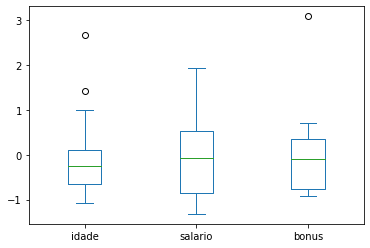

In [ ]:
dfTeste.plot(kind = 'box') 

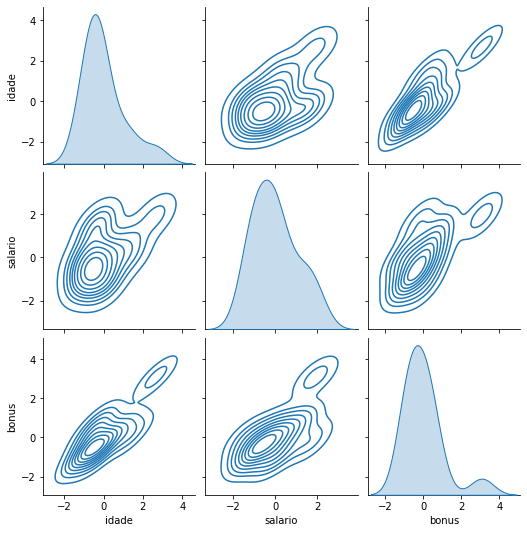

In [ ]:
sb.pairplot(dfTeste, kind='kde')

**Normalizer**

Vamos começar com o Normalizer que talvez seja a solução mais diferente, uma vez que o Normalize age reescalando os dados por exemplos/linhas e não por colunas, ou seja, o Normalizer levará em contas os atributos idade, salário e bonus e reescalar os valores com base nesses três valores. O Normalizer é uma boa escolha quando você sabe que a distribuição dos seus dados não é normal/gaussiana ou quando você não sabe qual é o tipo de distribuição dos seus dados.

In [ ]:
from sklearn.preprocessing import Normalizer
df_normalize = df.copy()
df_normalize[['idade', 'salario', 'bonus']] = Normalizer().fit_transform(df[['idade', 'salario', 'bonus']])
df_normalize

,cargo,idade,salario,bonus,sócio
0,Diretor,0.001731,0.923076,0.384615,sim
1,Analista,0.002668,0.970139,0.242535,não
2,Programador,0.001783,0.998231,0.059435,não
3,Gerente,0.001435,0.902638,0.430397,não
4,Gerente,0.000845,0.985622,0.168964,sim
5,Programador,0.003884,0.935595,0.353055,não
6,Analista,0.001188,0.997457,0.071267,não
7,Diretor,0.002538,0.913809,0.406137,sim
8,Fundador,0.001377,0.805055,0.593198,sim
9,Analista,0.003844,0.876969,0.480531,não


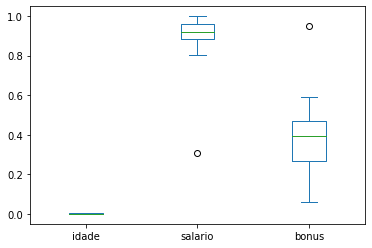

In [ ]:
df_normalize.plot(kind='box')

**MinMaxScale**

Normalização por reescala

O MinMaxScaler é uma outra alternativa a reescala de dados, seu diferencial se dá uma vez que este age sobre sobre a coluna, ou seja, o cálculo da reescala é feito de forma independente entre cada coluna, de tal forma que a nova escala se dará entre 0 e 1 (ou -1 e 1 se houver valores negativos no dataset). 

Importante ressaltar que essa técnica funciona melhor se a distribuição dos dados não for normal e se o desvio padrão for pequeno, além disso o MinMaxScaler não reduz de forma eficaz o impacto de outliers e também preserva a distribuição original.

De forma simples o MinMaxScaler subtrai o valor em questão pelo menor valor da coluna e então divide pela diferença entre o valor máximo e mínimo:
 > valor = ( valor — Coluna.min) / (Coluna.max — Coluna.min)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df[['idade', 'salario', 'bonus']] = MinMaxScaler().fit_transform(df[['idade', 'salario', 'bonus']])

print(df)

          cargo     idade   salario     bonus sócio
0       Diretor  0.555556  0.607359  0.333333   sim
1      Analista  0.044444  0.158627  0.037037   não
2   Programador  0.222222  0.405299  0.000000   não
3       Gerente  0.088889  0.357752  0.229630   não
4       Gerente  0.222222  0.915863  0.185185   sim
5   Programador  0.044444  0.082903  0.037037   não
6      Analista  0.000000  0.405299  0.007407   não
7       Diretor  0.666667  0.439085  0.259259   sim
8      Fundador  1.000000  1.000000  1.000000   sim
9      Analista  0.266667  0.138995  0.111111   não
10  Programador  0.333333  0.000000  0.229630   não
11  Programador  0.177778  0.060467  0.044444   não
12     Fundador  0.177778  0.775634  0.407407   sim
13  Programador  0.222222  0.326902  0.333333   sim


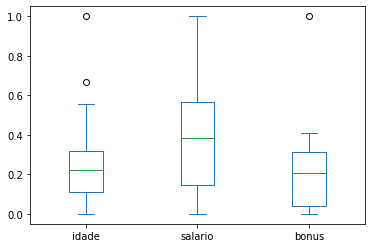

In [ ]:
df.plot(kind = 'box') 

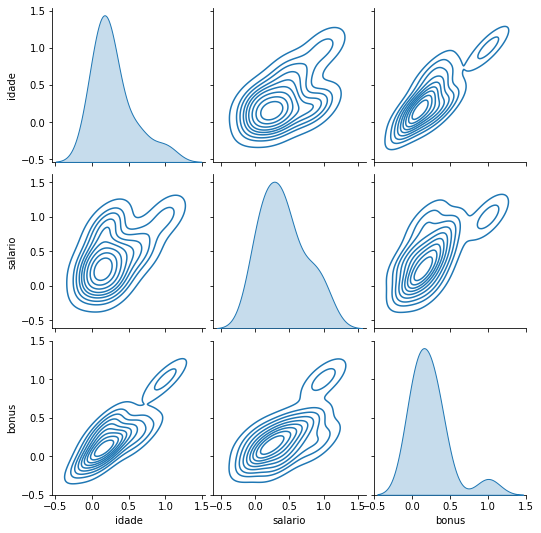

In [ ]:
sb.pairplot(df, kind='kde')

## **3.4) Mudança de tipo**

As colunas cargo e sócio são categóricas. Ao transformá-las em numéricas, devemos ter cuidado com a **ordem** imposta pelos números. 

Caso os atributos categóricos sejam não ordenáveis, devemos criar colunas que representem cada possível valor. Assim cada amostra terá o valor 0 ou 1 para esse atributo,indicando sua presença ou ausência.

In [ ]:
dfCargo = pd.get_dummies(df['cargo'], prefix = 'cargo')

In [ ]:
dfCargo

,cargo_Analista,cargo_Diretor,cargo_Fundador,cargo_Gerente,cargo_Programador
0,0,1,0,0,0
1,1,0,0,0,0
2,0,0,0,0,1
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,0,1
6,1,0,0,0,0
7,0,1,0,0,0
8,0,0,1,0,0
9,1,0,0,0,0


In [ ]:
df.iloc[:, 1:]

,idade,salario,bonus,sócio
0,0.555556,0.607359,0.333333,sim
1,0.044444,0.158627,0.037037,não
2,0.222222,0.405299,0.000000,não
3,0.088889,0.357752,0.229630,não
4,0.222222,0.915863,0.185185,sim
5,0.044444,0.082903,0.037037,não
6,0.000000,0.405299,0.007407,não
7,0.666667,0.439085,0.259259,sim
8,1.000000,1.000000,1.000000,sim
9,0.266667,0.138995,0.111111,não


In [ ]:
df = dfCargo.join(df.iloc[:, 1:]) #junta o dfCargo com o df sem a coluna cargo

In [ ]:
df

,cargo_Analista,cargo_Diretor,cargo_Fundador,cargo_Gerente,cargo_Programador,idade,salario,bonus,sócio
0,0,1,0,0,0,0.555556,0.607359,0.333333,sim
1,1,0,0,0,0,0.044444,0.158627,0.037037,não
2,0,0,0,0,1,0.222222,0.405299,0.000000,não
3,0,0,0,1,0,0.088889,0.357752,0.229630,não
4,0,0,0,1,0,0.222222,0.915863,0.185185,sim
5,0,0,0,0,1,0.044444,0.082903,0.037037,não
6,1,0,0,0,0,0.000000,0.405299,0.007407,não
7,0,1,0,0,0,0.666667,0.439085,0.259259,sim
8,0,0,1,0,0,1.000000,1.000000,1.000000,sim
9,1,0,0,0,0,0.266667,0.138995,0.111111,não


**LabelEnconder**

Transforma os nomes em números

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sócio'] = le.fit_transform(df['sócio'])

In [ ]:
df

,cargo_Analista,cargo_Diretor,cargo_Fundador,cargo_Gerente,cargo_Programador,idade,salario,bonus,sócio
0,0,1,0,0,0,0.555556,0.607359,0.333333,1
1,1,0,0,0,0,0.044444,0.158627,0.037037,0
2,0,0,0,0,1,0.222222,0.405299,0.000000,0
3,0,0,0,1,0,0.088889,0.357752,0.229630,0
4,0,0,0,1,0,0.222222,0.915863,0.185185,1
5,0,0,0,0,1,0.044444,0.082903,0.037037,0
6,1,0,0,0,0,0.000000,0.405299,0.007407,0
7,0,1,0,0,0,0.666667,0.439085,0.259259,1
8,0,0,1,0,0,1.000000,1.000000,1.000000,1
9,1,0,0,0,0,0.266667,0.138995,0.111111,0


In [ ]:
le.inverse_transform(df['sócio']) #para ver os rótulos novamente

array(['sim', 'não', 'não', 'não', 'sim', 'não', 'não', 'sim', 'sim',
       'não', 'não', 'não', 'sim', 'sim'], dtype=object)

## **3.5) Redução de dimensionalidade**

A redução de dimensionalidade é um processo que tem por objetivo diminuir o número de variáveis — ou dimensões — de um conjunto de dados (dataset) visando a menor perda de informações possível. 

O algoritmo Análise dos Componentes Principais é o mais popular.

### Correlação

In [ ]:
corr = df[['idade', 'salario', 'bonus']].corr()
corr

,idade,salario,bonus
idade,1.000000,0.516473,0.811541
salario,0.516473,1.000000,0.670233
bonus,0.811541,0.670233,1.000000


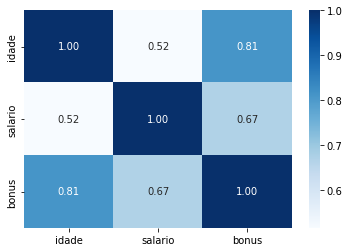

In [ ]:
sb.heatmap(corr, annot=True, fmt=".2f", cmap='Blues')

### Seleção de atributos

https://scikit-learn.org/stable/modules/feature_selection.html

### Agregação de atributos

Uma forma muito usada de redução de dimensionalidade é o **PCA (Análise dos componentes principais)** que é uma técnica que transforma atributos com uma certa correlação em um único atributo. 

O PCA deve ser aplicado apenas em casos em que o seu dataset possui muitas colunas, realmente um número muito grande e o treino do seu modelo acaba por ser muito demorado ou inviável devido ao alto número de colunas, uma vez que o PCA é uma técnica na qual sempre haverá perda de informações. 

Em nosso exemplo o PCA será aplicado de forma meramente ilustrativa uma vez que não possuímos muitas colunas.

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
df.iloc[:,:-1] #retorna todo o dataframe, exceto a última coluna (alvo)

,cargo_Analista,cargo_Diretor,cargo_Fundador,cargo_Gerente,cargo_Programador,idade,salario,bonus
0,0,1,0,0,0,0.555556,0.607359,0.333333
1,1,0,0,0,0,0.044444,0.158627,0.037037
2,0,0,0,0,1,0.222222,0.405299,0.000000
3,0,0,0,1,0,0.088889,0.357752,0.229630
4,0,0,0,1,0,0.222222,0.915863,0.185185
5,0,0,0,0,1,0.044444,0.082903,0.037037
6,1,0,0,0,0,0.000000,0.405299,0.007407
7,0,1,0,0,0,0.666667,0.439085,0.259259
8,0,0,1,0,0,1.000000,1.000000,1.000000
9,1,0,0,0,0,0.266667,0.138995,0.111111


In [ ]:
from sklearn.decomposition import PCA

 #O atributo n_components representa quantos atributos queremos deixar
 #usando ’mle’ o Minka’s MLE será utilizado para escolher a melhor dimensão a ser mantida
pca = PCA(n_components='mle')

newData = pca.fit_transform(df.iloc[:,:-1])
#newData

In [ ]:
dfNew = pd.DataFrame(newData)

In [ ]:
dfNew

,0,1,2,3,4,5,6
0,0.538666,-0.132673,-0.335747,0.797916,0.084665,-0.057145,0.070214
1,-0.136827,0.932838,-0.212710,-0.162717,-0.002876,0.045334,0.018614
2,-0.603636,-0.376445,0.016362,-0.048506,0.072547,-0.233347,-0.094616
3,0.201868,0.182088,0.904577,0.154439,-0.062577,0.263624,0.034314
4,0.469561,0.081266,0.958319,0.128387,-0.036214,-0.226276,-0.037466
5,-0.782750,-0.296091,0.010318,-0.047064,0.119467,0.057194,0.013656
6,-0.050146,0.916120,-0.161142,-0.184673,0.082310,-0.167030,0.038878
7,0.473515,-0.118716,-0.382454,0.837649,0.015171,0.067569,-0.062324
8,1.213799,-0.626536,-0.301079,-0.592176,-0.310027,-0.026410,-0.008237
9,-0.061571,0.863221,-0.280715,-0.147103,-0.188053,0.061814,-0.054286


## **3.6) Balanceamento da base**

Bases de dados desbalanceadas são aquelas em que há uma maior proporção de amostras de uma classe do que da(s) outra(s)

Chamamos de classe minoritária a que tem menos exemplos e de classe majoritária a que tem mais exemplos

Para efetuar o balanceamento podemos fazer um oversampling (sobreamostragem) ou um undersampling (subamostragem). No primeiro, nós aumentamos exemplos da classe minoritária e no segundo nós diminuimos exemplos da classe majoritária.


https://imbalanced-learn.org/stable/user_guide.html#user-guide


https://imbalanced-learn.org/stable/references/index.html

O algoritmo Near Miss  utiliza a menor distância média dos K-vizinhos mais próximos, ou seja, seleciona os valores baseando-se no método KNN (K-nearest neighbors) para reduzir a perda de informação.

In [ ]:
#verifica desbalanceamento
df['sócio'].value_counts()

0    8
1    6
Name: sócio, dtype: int64

In [ ]:
from imblearn.under_sampling import NearMiss 

X, y = NearMiss().fit_resample(df.drop(columns=['sócio']), df['sócio'])


In [ ]:
dfTeste = pd.DataFrame(X, columns=df.columns.drop('sócio'))
dfTeste['sócio'] = y
print(dfTeste)

    cargo_Analista  cargo_Diretor  cargo_Fundador  cargo_Gerente  \
0                0              0               0              0   
1                0              0               0              0   
2                0              0               0              1   
3                0              0               0              0   
4                0              0               0              0   
5                1              0               0              0   
6                0              1               0              0   
7                0              0               0              1   
8                0              1               0              0   
9                0              0               1              0   
10               0              0               1              0   
11               0              0               0              0   

    cargo_Programador     idade   salario     bonus  sócio  
0                   1  0.222222  0.405299  0.000000   

In [ ]:
dfTeste['sócio'].value_counts()

0    6
1    6
Name: sócio, dtype: int64

##4) Salvando dataset processado

In [ ]:
df.to_csv('./bases/fake_data_process.csv', index=False)